In [1]:
import sys
sys.path.append('../deeprl')

In [2]:
import gym
env = gym.make('MountainCar-v0')
print env.action_space
print env.observation_space.low
print env.observation_space.high
print env.goal_position

[2016-10-28 21:24:48,912] Making new env: MountainCar-v0


Discrete(3)
[-1.2  -0.07]
[ 0.6   0.07]
0.5


/Users/pvrancx/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


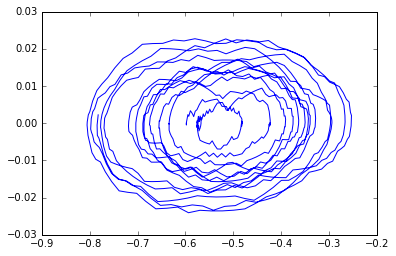

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

obs = env.reset()
log = []

# perform 1000 steps
for step in range(1000):
    action = env.action_space.sample()
    obs,rew,terminal,_ = env.step(action)
    log.append(obs)
    
log = np.array(log)
plt.plot(log[:,0],log[:,1])


Create a neural network to represent the Q-function.

In [72]:
import tensorflow as tf
import tflearn as nn

def create_mlp(inputs, n_out):
    net = nn.input_data(placeholder=inputs)
    net = nn.fully_connected(net, 25, activation='relu')
    net = nn.dropout(net, 0.3)
    net = nn.fully_connected(net, 25, activation='relu')
    net = nn.dropout(net, 0.3)
    net = nn.fully_connected(net, n_out, activation='linear')
    return net

Create a DQNAgent and run an experiment on the Mountaincar environment

In [73]:
from agents import DQNAgent
from experiment import Experiment

tf.reset_default_graph()

#create a DQNAgent
agent = DQNAgent(create_mlp, env.action_space.n, env.observation_space.shape, alpha=0.001, gamma=0.99,
                     min_replay_size=1000, replay_size=100000, batch_size=64)
exp = Experiment(agent, env)
exp.run_epoch(200000)

episode reward: -2634.000000
episode reward: -1015.000000
episode reward: -776.000000
episode reward: -723.000000
episode reward: -1522.000000
episode reward: -356.000000
episode reward: -517.000000
episode reward: -999.000000
episode reward: -796.000000
episode reward: -411.000000
episode reward: -373.000000
episode reward: -421.000000
episode reward: -102.000000
episode reward: -148.000000
episode reward: -220.000000
episode reward: -335.000000
episode reward: -490.000000
episode reward: -144.000000
episode reward: -466.000000
episode reward: -631.000000
episode reward: -850.000000
episode reward: -359.000000
episode reward: -300.000000
episode reward: -189.000000
episode reward: -197.000000
episode reward: -206.000000
episode reward: -255.000000
episode reward: -259.000000
episode reward: -272.000000
episode reward: -177.000000
episode reward: -123.000000
episode reward: -110.000000
episode reward: -138.000000
episode reward: -206.000000
episode reward: -2296.000000
episode reward: 

999

In [74]:
highs = env.observation_space.high
lows = env.observation_space.low
Xs, Ys = np.meshgrid(np.linspace(lows[0],highs[0],30), np.linspace(lows[1],highs[1],30))
Zs = np.zeros_like(Xs)

for idx in range(Xs.size):
    s = np.zeros((1,2))
    s[0,0]=Xs.flat[idx]
    s[0,1]=Ys.flat[idx]
    Zs.flat[idx] = np.max(agent.get_values(s))


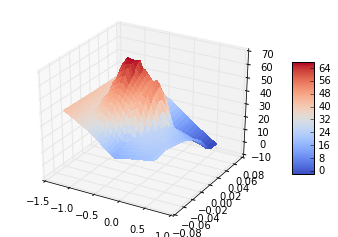

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(Xs, Ys, -Zs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [76]:
obs = env.reset()
for step in range(1000):
    action = agent.select_action(obs[np.newaxis,:])
    obs,rew,terminal,_ = env.step(action)
    env.render()
    if terminal:
        break